In [3]:
import pandas as pd
data=pd.read_csv("Instagram_data_by_Bhanu.csv",encoding='latin-1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
print(data.columns)
print(data.isnull().sum())

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [8]:
#distribution of impressions(reach)
import plotly.express as px
fig=px.histogram(data,x='Impressions',nbins=10,title='Distribution of Impressions')
fig.show()

In [9]:
#impressions over time at each post
fig=px.line(data,x=data.index,y='Impressions',title='Impressions over time')
fig.show()

In [14]:
#reach sources
reach_sources=['From Home','From Hashtags','From Explore','From Other']
reach_count=[data[source].sum() for source in reach_sources]
# colours=['blue','green','red','pink']
fig=px.pie(data_frame=data,names=reach_sources,values=reach_count)
fig.show()

In [15]:
#post engagement
post_source=['Saves','Comments','Likes','Shares']
post_count=[data[source].sum() for source in post_source]
fig=px.pie(data_frame=data,names=post_source,values=post_count)
fig.show()

In [21]:
#relationship between profile visits and follows
fig=px.scatter(data,x='Profile Visits',y='Follows',title='relationship between profile visits and follows',trendline='ols')
fig.show()

In [26]:
import plotly.graph_objects as go
# data.drop(columns=['Caption'],inplace=True)
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,#datavisualization #datascience #data #dataana...


In [30]:
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                               x=corr_matrix.columns,
                               y=corr_matrix.index,
                               colorscale='RdBu',
                               zmin=-1,
                               zmax=1))

fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

fig.show()

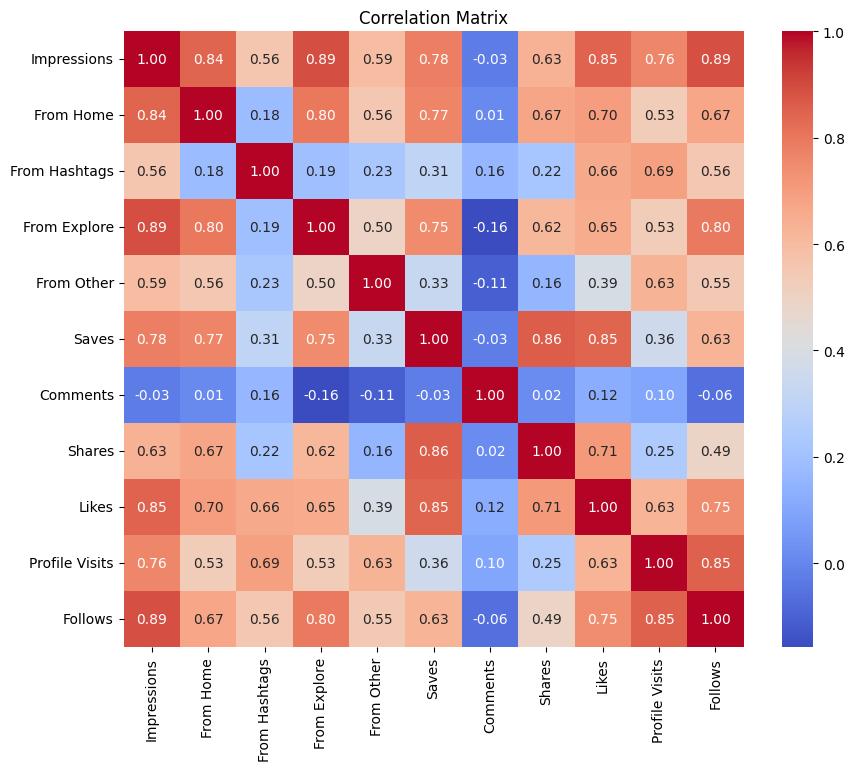

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'corr_matrix' contains your correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()